In [1]:
import numpy as np
import matplotlib.pyplot as plt

from rayopt import *

np.set_printoptions(precision=3)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:294: RuntimeWarning: divide by zero encountered in double_scalars
  yield "petzval radius: %.5g" % (1/self.petzval_curvature)
/usr/lib/python3/dist-packages/scipy/optimize/zeros.py:150: RuntimeWarning: Tolerance of 4.75505316472e+35 reached
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/scipy/optimize/zeros.py:150: RuntimeWarning: Tolerance of 0.0001 reached
  warnings.warn(msg, RuntimeWarning)
/home/rj/work/nist/pyrayopt/rayopt/elements.py:208: RuntimeWarning: invalid value encountered in less_equal
  good = np.square(y[:, :2]).sum(1) <= self.radius**2
/usr/lib/python3/dist-packages/scipy/optimize/zeros.py:150: RuntimeWarning: Tolerance of 5.65662995862e+36 reached
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/scipy/optimize/zeros.py:150: RuntimeWarning: Tolerance of 1.29426793405e+28 reached
  warnings.warn(msg, RuntimeWarning)
/home/rj/work/nist/pyrayopt/rayopt/analysis.py:403: RuntimeWar

System: Offner Relay, 1:1 f/10, 32mm, US3748015
Scale: 1.0 mm
Wavelengths: 588 nm
Object:
 Index: 1
 Entrance: 144 dia at 402
 Radius: 16
Image:
 Index: 1
 Entrance: 144 dia at 402
 Radius: 16
Stop: 2
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf       32.2      basic/vacuum   1.000   1.000     inf
 1 S     401.62       -400        144      basic/mirror   1.000   1.000     inf
 2 S     199.19      200.8         20      basic/mirror   1.000   1.000     inf
 3 S     199.19       -400        144      basic/mirror   1.000   1.000     inf
 4 S     401.62        inf       32.2      basic/vacuum   1.000   1.000     inf
description: Offner Relay, 1:1 f/10, 32mm, US3748015
elements:
- {material: basic/vacuum, radius: 16.1}
- angles: [0.08975817418995052, 0.0, 0.0]
  curvature: -0.0025
  direction: [0.0, -0.0896376994958906, 0.9959744388432288]
  distance: 401.61673271914356
  material: basic/mirror
  radius: 72.0
- curvature

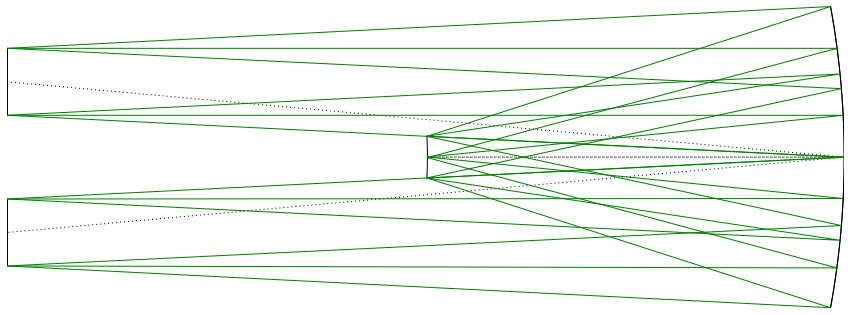

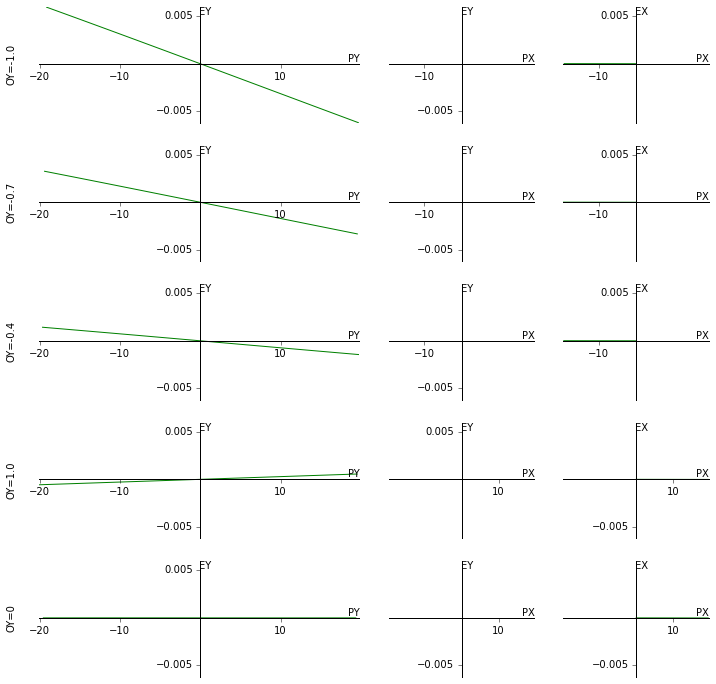

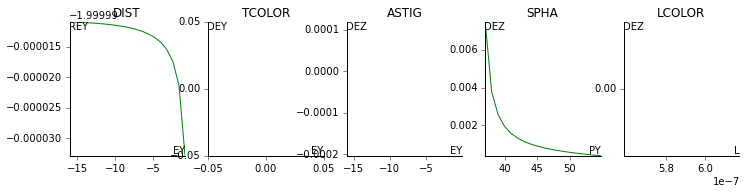

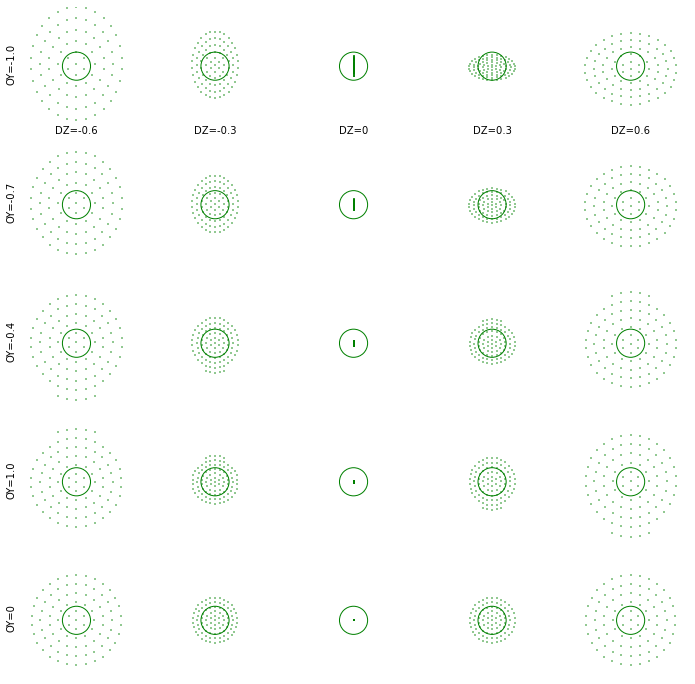

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


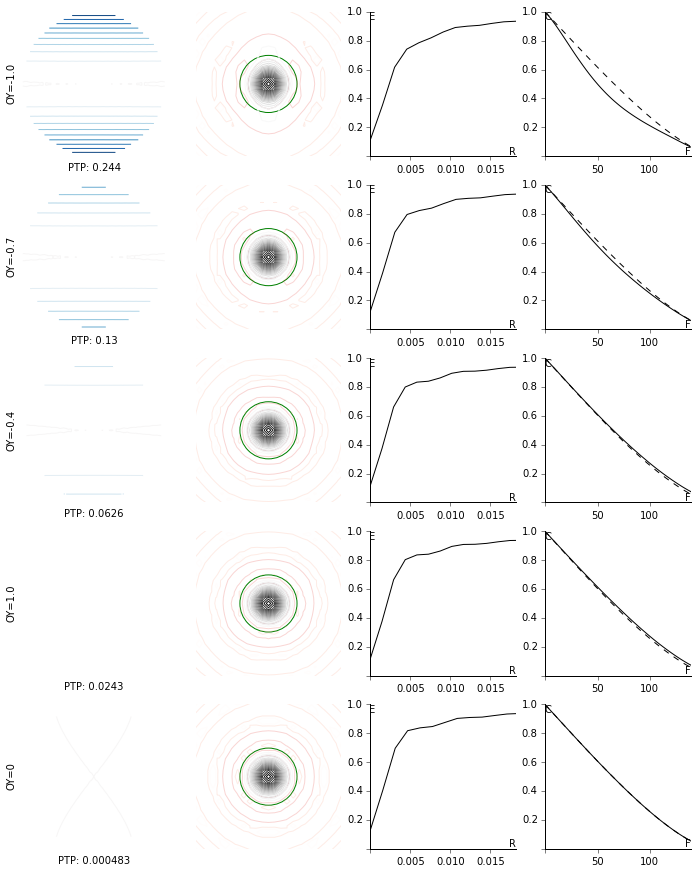

In [30]:
s = system_from_yaml("""
description: Offner Relay, 1:1 f/10, 32mm, US3748015
object: {type: finite, radius: 16}
stop: 2
wavelengths: [588.0e-9]
elements:
- {material: vacuum}
- {material: mirror, offset: [0, -36, 400.]}
- {}
- {}
- {}
pickups:
- {set: [2, material], get: [1, material]}
- {set: [3, material], get: [1, material]}
- {set: [4, material], get: [0, material]}
- {set: [1, curvature], get_eval: "-1/self[1].offset[2]"}
- {set: [2, curvature], get_eval: "-2/(1/self[1].curvature + self[1].offset[1]**2/2*self[1].curvature)"}
- {set: [3, curvature], get: [1, curvature]}
- {set: [0, radius], get: [object, radius], offset: .1}
- {set: [1, radius], get: [1, offset, 1], factor: -2}
- {set: [2, radius], get_eval: "(self[1].offset[1] + self.object.radius)/-2"}
- {set: [3, radius], get: [1, radius]}
- {set: [4, radius], get: [0, radius]}
- {set: [image, radius], get: [object, radius]}
- {set: [2, offset], get_eval: "[0, 0, 1/self[1].curvature + 1/self[2].curvature]"}
- {set: [3, offset], get: [2, offset], factor: -1}
- {set: [4, offset], get: [1, offset], factor: [1, 1, -1]}
- {set: [1, angles], get_eval: "[-np.arcsin(self[1].offset[1]/self[1].distance), 0, 0]"}
- {set: [4, angles], get: [1, angles], factor: -1}
""")
s.update()
print(s)
print(system_to_yaml(s))
print(s.origins)

a = Analysis(s, resize=False, update_conjugates=False,
             refocus_paraxial=False, 
             plot_heights=[0, 1., -.4, -.7, -1.])
a.figures[0].set_figheight(15)
a.figures[0].set_figwidth(15)